<a href="https://colab.research.google.com/github/abishekparajuli-np/PythonProjects/blob/main/CaliforniaHousingPrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#End to End Machine Learning Project(From Hands On Machine Learning Book)

*Here we are finding the median Housing Price of Californian Districts with the help of numbers of features from these district*

*Downloading the Data*

In [ ]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def LoadHousingData():
  tarball_path=Path('datasets/housing.tgz')
  if not tarball_path.is_file():
    Path('datasets').mkdir(parents=True,exist_ok=True)
    url='https://github.com/ageron/data/raw/main/housing.tgz'
    urllib.request.urlretrieve(url,tarball_path)
  with tarfile.open(tarball_path) as housing_tarball:
    housing_tarball.extractall(path='datasets')
  return pd.read_csv('datasets/housing/housing.csv')

housing= LoadHousingData()



/tmp/ipython-input-44592646.py:13: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  housing_tarball.extractall(path='datasets')


In [ ]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
housing['ocean_proximity'].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [ ]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


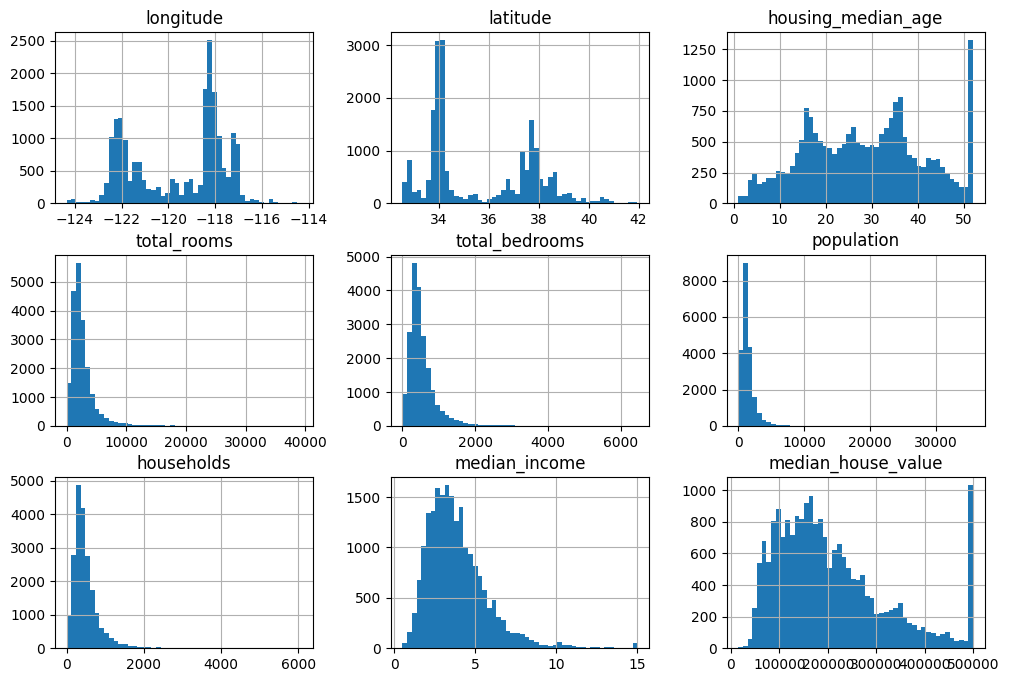

In [ ]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(12,8))
plt.show()

*Creating Test Set*

In [ ]:
import numpy as np
def shuffle_and_split_data(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [ ]:
train_set, test_set = shuffle_and_split_data(housing, 0.2)
len(train_set)

16512

In [ ]:
len(test_set)

4128

In [ ]:
from zlib import crc32

def is_in_test_set(identifier,test_ratio):
  return crc32(np.int64(identifier)) < test_ratio*2**32
def split_data_with_hash_id(data,test_ratio,id_column):
  ids=data[id_column]
  in_test_set=ids.apply(lambda x:is_in_test_set(x,test_ratio))
  return data.loc[~in_test_set],data.loc[in_test_set]

In [ ]:
housing_with_id=housing.reset_index()
train_set,test_set=split_data_with_hash_id(housing_with_id,0.2,'index')


In [ ]:
housing_with_id.reset_index(drop=True,inplace=True)

In [ ]:
housing_with_id['id']=housing['longitude']*1000+housing['latitude']

In [ ]:
train_set,test_set=split_data_with_hash_id(housing_with_id,0.2,'index')

*This splitting can also be done with the help of function of sckit learn*

In [ ]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(housing,test_size=0.2,random_state=42)

In [ ]:
housing['income_cat']=pd.cut(housing['median_income'],
                             bins=[0.,1.5,3.0,4.5,6,np.inf],
                             labels=[1,2,3,4,5])

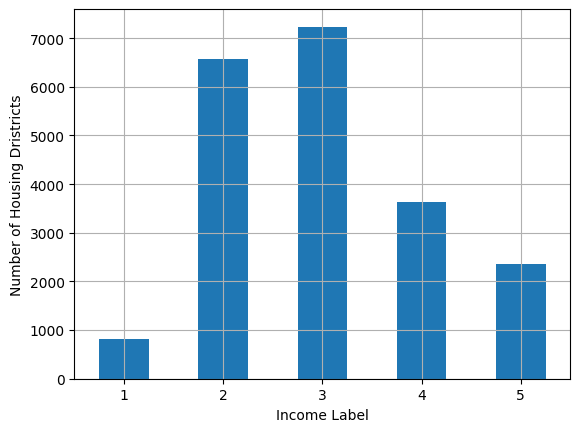

In [ ]:
housing['income_cat'].value_counts().sort_index().plot.bar(rot=0,grid=True)
plt.xlabel('Income Label')
plt.ylabel('Number of Housing Dristricts')
plt.show()

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
splitter = StratifiedShuffleSplit(n_splits=10,test_size=0.2,random_state=42)
strat_splits=[]
for train_index, test_index in splitter.split(housing, housing["income_cat"]):
  strat_train_set_n=housing.iloc[train_index]
  strat_test_set_n=housing.iloc[test_index]
  strat_splits.append([strat_train_set_n,strat_test_set_n])

In [ ]:
strat_train_set, strat_test_set = strat_splits[0]

In [ ]:
#Easier Way

In [ ]:
strat_train_set,strat_test_set=train_test_split(housing,test_size=0.2,random_state=42,stratify=housing['income_cat'])

In [ ]:
strat_test_set['income_cat'].value_counts()/len(strat_test_set)

,count
income_cat,
3,0.350533
2,0.318798
4,0.176357
5,0.114341
1,0.039971


In [ ]:
for set_ in (strat_train_set,strat_test_set):
  set_.drop('income_cat',axis=1,inplace=True)

*Discover and Visualize data*

In [ ]:
housing=strat_train_set.copy()

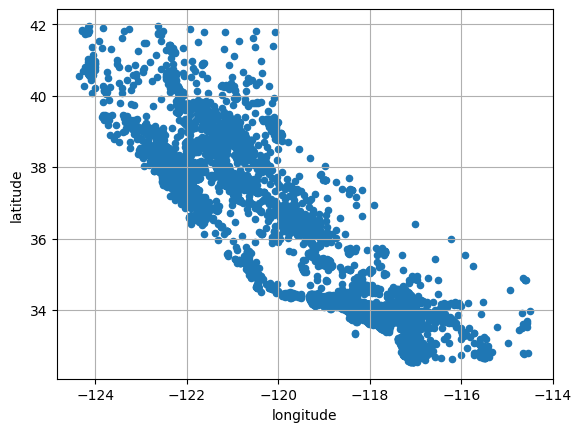

In [ ]:
housing.plot(kind='scatter',x='longitude',y='latitude',grid='True')
plt.show()

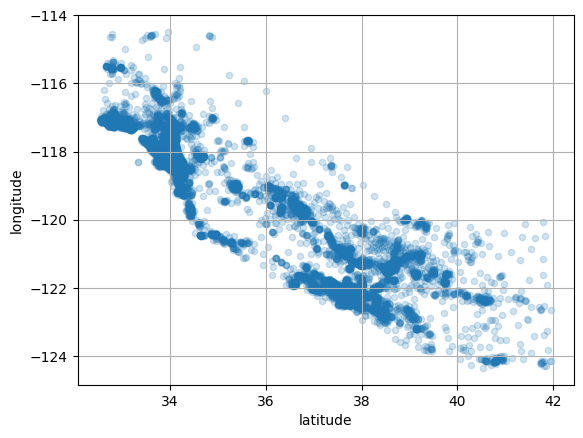

In [ ]:
housing.plot(kind='scatter',x='latitude',y='longitude',alpha=0.2,grid=True)
plt.show()

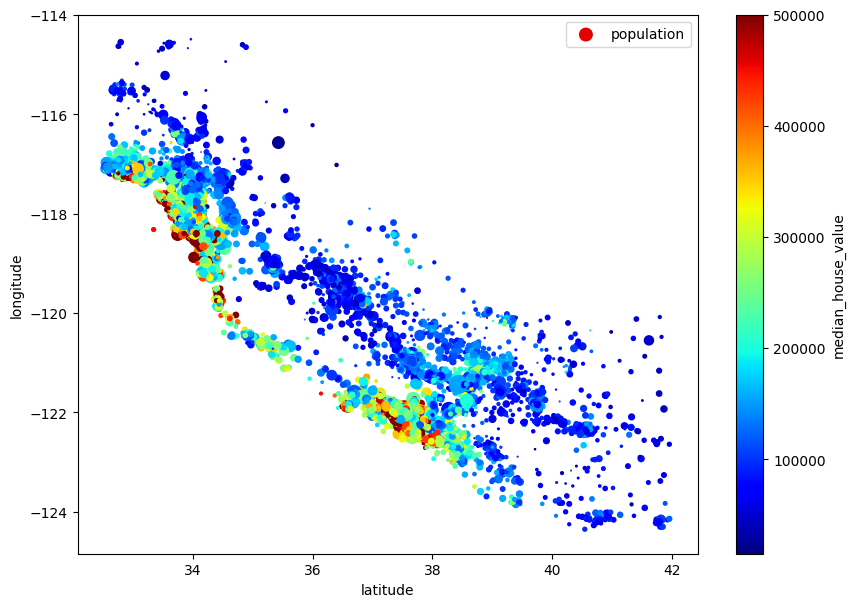

In [ ]:
housing.plot(kind='scatter',x='latitude',y='longitude',s=housing['population']/100,
             label='population',c='median_house_value',cmap='jet',colorbar=True,legend=True,sharex=False,figsize=(10,7))
plt.show()

In [ ]:
corr_matrix=housing.corr(numeric_only=True)

In [ ]:
corr_matrix['median_house_value'].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.688380
total_rooms,0.137455
housing_median_age,0.102175
households,0.071426
total_bedrooms,0.054635
population,-0.020153
longitude,-0.050859
latitude,-0.139584


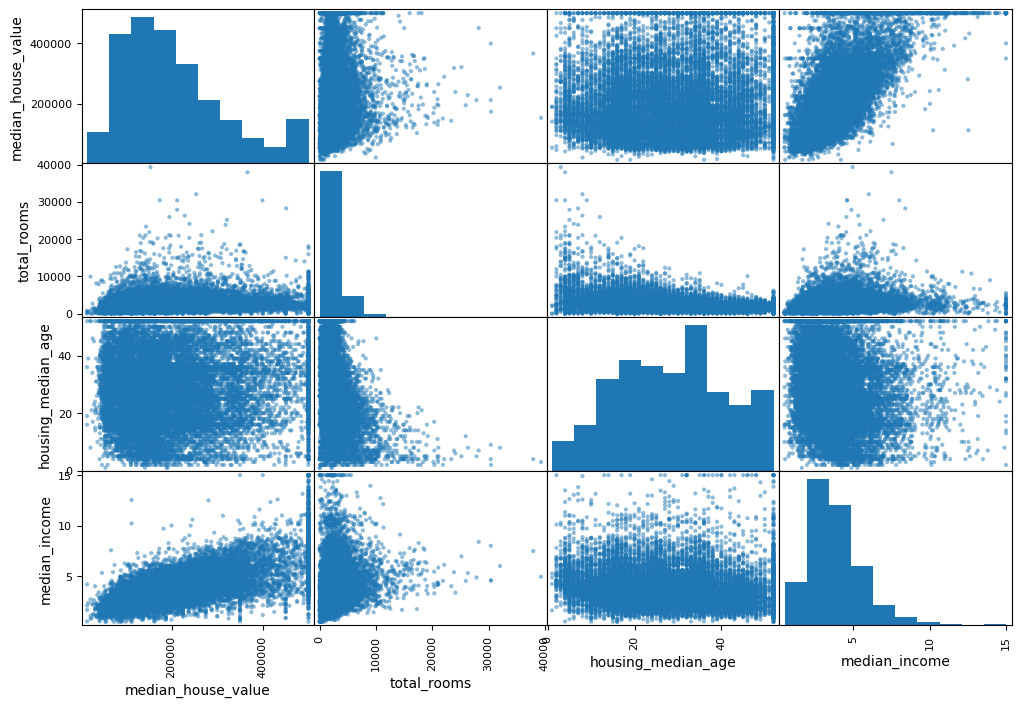

In [ ]:
from pandas.plotting import scatter_matrix
attributes=['median_house_value','total_rooms','housing_median_age','median_income']
scatter_matrix(housing[attributes],figsize=(12,8))
plt.show()

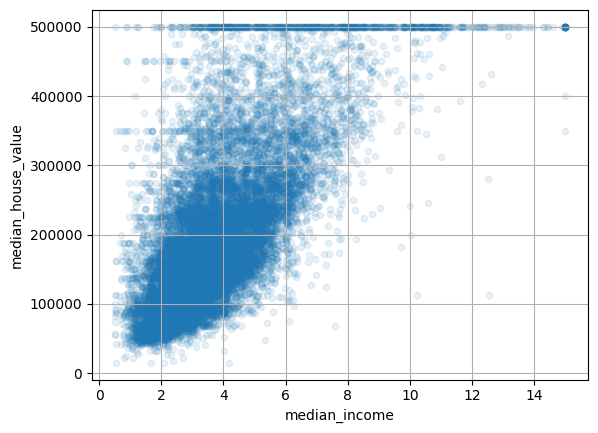

In [ ]:
housing.plot(kind='scatter',x='median_income',y='median_house_value',alpha=0.1,grid=True)
plt.show()

In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 13096 to 19888
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16344 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


In [ ]:
housing['rooms_per_house']=housing['total_rooms']/housing['households']
housing['bedrooms_ratio']=housing['total_bedrooms']/housing['total_rooms']
housing['people_per_house']=housing['population']/housing['households']

In [ ]:
corr_matrix=housing.corr(numeric_only=True)

In [ ]:
corr_matrix['median_house_value'].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.688380
rooms_per_house,0.143663
total_rooms,0.137455
housing_median_age,0.102175
households,0.071426
total_bedrooms,0.054635
population,-0.020153
people_per_house,-0.038224
longitude,-0.050859


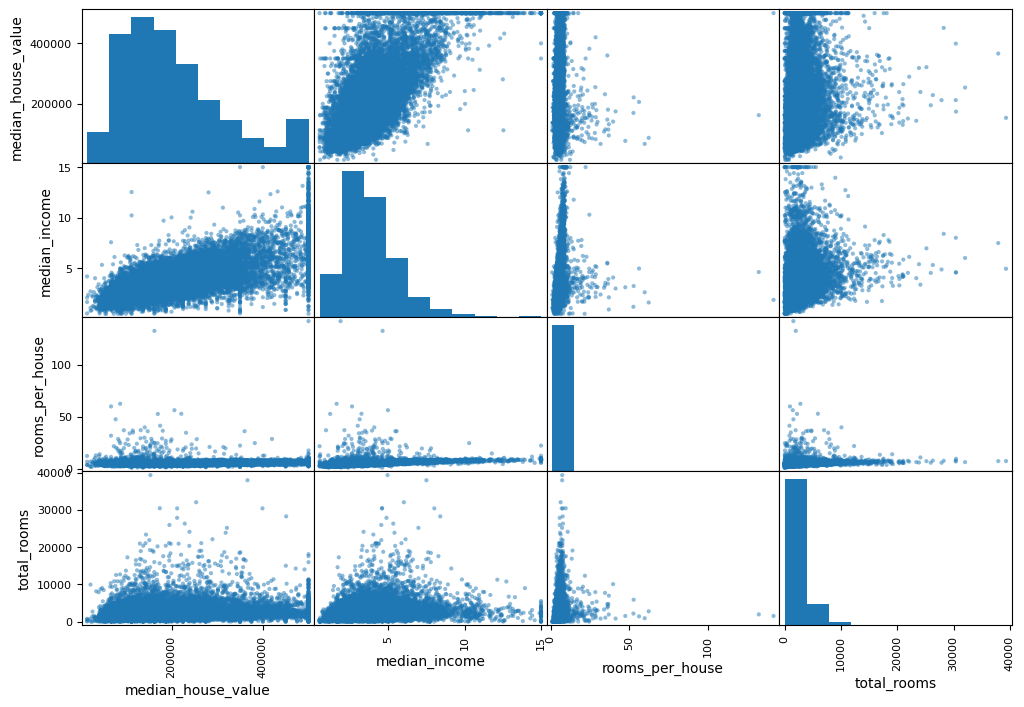

In [ ]:
from pandas.plotting import scatter_matrix
attributes=['median_house_value','median_income','rooms_per_house','total_rooms']
scatter_matrix(housing[attributes],figsize=(12,8))
plt.show()

*Preparing Data for ML algorithms*

In [ ]:
housing=strat_train_set.drop('median_house_value',axis=1)
housing_label=strat_train_set['median_house_value'].copy()

*Data Cleaning*

In [ ]:
from sklearn.impute import SimpleImputer
imputer= SimpleImputer(strategy='median')

In [ ]:
housing_num=housing.select_dtypes(include=[np.number])

In [ ]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [ ]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [ ]:
X= imputer.transform(housing_num)

In [ ]:
housing_tr=pd.DataFrame(X,columns=housing_num.columns,index=housing_num.index)

In [ ]:
housing_cat=housing[['ocean_proximity']]
housing_cat.head(8)

,ocean_proximity
13096,NEAR BAY
14973,<1H OCEAN
3785,INLAND
14689,INLAND
20507,NEAR OCEAN
1286,INLAND
18078,<1H OCEAN
4396,NEAR BAY


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('ocean_proximity').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_3['ocean_proximity'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_3, x='index', y='ocean_proximity', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder=OrdinalEncoder()
housing_cat_encoded=ordinal_encoder.fit_transform(housing_cat)

In [ ]:
housing_cat_encoded[:8]

array([[3.],
       [0.],
       [1.],
       [1.],
       [4.],
       [1.],
       [0.],
       [3.]])

In [ ]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [ ]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder=OneHotEncoder()
housing_cat_1hot=cat_encoder.fit_transform(housing_cat)

In [ ]:
housing_cat_1hot

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16512 stored elements and shape (16512, 5)>

In [ ]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [ ]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]